# Mini-Project(2)-House Grade Classification

### Objective- Property buyers have different requirements. To facilitate this, real estate companies prefer categorizing various houses into different grades based on various parameters. This would help agents in identifying the type of house a customer is looking for. This way, the search for the house can be narrowed down by focusing only on the ‘condition of the house’.


## Exploring the data

### Importing the required libraries

In [1]:
import pandas as pd                                              #importing the pandas library
import numpy as np                                               #importing the numpy library
import seaborn as sns                                            #importing the library for visualisatrion
import matplotlib.pyplot as plt                                  #importing the library for visualisatrion
from tabulate import tabulate                                    #For using the table form to our data
import warnings                                                  #To avoid the shown warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing                                #For the preprocessing purpose
from sklearn.preprocessing import MinMaxScaler,StandardScaler    #for scaling the data
from sklearn.model_selection import train_test_split             #for splitting the dataset in training and testing dataset
from sklearn.naive_bayes import GaussianNB                       #for building a model
from sklearn import metrics                                      #importing for evaluation purpose
from sklearn.metrics import confusion_matrix,accuracy_score      #for evaluation of the model
from sklearn.tree import DecisionTreeClassifier                  #for building the model
from sklearn.metrics import classification_report                #for evaluation of the model
from sklearn.linear_model import LogisticRegression              #for building the model
from sklearn.metrics import roc_curve,roc_auc_score              #for evaluation of the model
from sklearn.model_selection import KFold,cross_val_score        #for making the fold of datset into subset,modelevaluation
from sklearn.ensemble import RandomForestClassifier              #for building a model

### Loading the data

In [2]:
hdf=pd.read_csv("C:/Users/Admin/Downloads/Project2_Classification_HouseGrade_Data_Project-625edbc5-68f4-4fe4-97f2-29ba63a71a0e.csv")
#Preview the datafile
hdf.head()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D


### Shape of Data

In [3]:
hdf.shape

(3000, 14)

###### Here we can see that our dataset contains 3000 rows and 14 columns

### Columns of Data

In [4]:
hdf.columns

Index(['Id', 'Area(total)', 'Trooms', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms',
       'roof', 'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'ANB',
       'Expected price', 'Grade'],
      dtype='object')

### Information and Summary of Data

In [5]:
hdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              3000 non-null   int64 
 1   Area(total)     3000 non-null   int64 
 2   Trooms          3000 non-null   int64 
 3   Nbedrooms       3000 non-null   int64 
 4   Nbwashrooms     3000 non-null   int64 
 5   Twashrooms      3000 non-null   int64 
 6   roof            3000 non-null   object
 7   Roof(Area)      3000 non-null   int64 
 8   Lawn(Area)      3000 non-null   int64 
 9   Nfloors         3000 non-null   int64 
 10  API             3000 non-null   int64 
 11  ANB             3000 non-null   int64 
 12  Expected price  3000 non-null   int64 
 13  Grade           3000 non-null   object
dtypes: int64(12), object(2)
memory usage: 328.2+ KB


In [6]:
hdf.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,3000.0,1500.500000,866.169729,1.0,750.75,1500.5,2250.25,3000.0
Area(total),3000.0,325.117000,20.507742,290.0,308.00,325.0,343.00,360.0
Trooms,3000.0,7.021667,1.421221,5.0,6.00,7.0,8.00,9.0
Nbedrooms,3000.0,5.023000,1.634838,2.0,4.00,5.0,6.00,8.0
Nbwashrooms,3000.0,4.513667,1.715263,1.0,3.00,4.0,6.00,8.0
Twashrooms,3000.0,6.010667,1.786136,2.0,5.00,6.0,7.00,10.0
Roof(Area),3000.0,48.980667,48.746641,0.0,0.00,71.0,96.00,120.0
Lawn(Area),3000.0,95.609333,14.837388,70.0,83.00,96.0,109.00,120.0
Nfloors,3000.0,4.013333,1.621532,1.0,3.00,4.0,5.00,7.0
API,3000.0,70.190667,17.563460,40.0,55.00,70.0,85.00,100.0


### Chcking the Missing Values in our Data

In [7]:
hdf.isnull().sum()

Id                0
Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64

###### Here we can see that our dataset don't have any missing value,so the missing value treatment would not be required here

### Separating Numerical(Continuous) and Categorical Variables from dataset

In [8]:
# Seprating out the categorical and continuous variables
def seprate_data_types(hdf):
    categorical = []
    continuous = []
    for column in hdf.columns:                # looping on the number of columns
        if hdf[column].nunique() < 20:       # nunique:  returns unique values in the column,                                      
            categorical.append(column)
        else:
            continuous.append(column)      
    return categorical, continuous 
categorical, continuous = seprate_data_types(hdf)         # Calling the function
table = [categorical, continuous]
print("The below table is of Separated Categorical and Continous Variables from Dataset:")
print(tabulate({"Categorical":categorical,         #tabulate will arrange the variables into tanle form under their quality
                "Continuous": continuous}, headers = ["categorical", "continuous"]))

The below table is of Separated Categorical and Continous Variables from Dataset:
categorical    continuous
-------------  --------------
Trooms         Id
Nbedrooms      Area(total)
Nbwashrooms    Roof(Area)
Twashrooms     Lawn(Area)
roof           API
Nfloors        Expected price
ANB
Grade


## EDA(Exploratory Data Analysis)

### Univariate Analysis of Categorical Variables

In [9]:
def cat_info(col): 
    print(f"Unique values in {col} are: {hdf[col].unique()}") # unique: returns the unique values in the col
    print(f"Mode of {col} is {hdf[col].mode()[0]}")  # mode: returns the mode of the column
    print(f"Number of missing values in {col} is {hdf[col].isnull().sum()}") # isnull().sum() counts the number of null in dataframe
    if hdf[col].isnull().sum() > 0:  # check if null values are present
        print(f"\nThere are null values in the {col} column")

### Analysis of Trooms

In [10]:
cat_info("Trooms") 

Unique values in Trooms are: [6 5 7 8 9]
Mode of Trooms is 9
Number of missing values in Trooms is 0


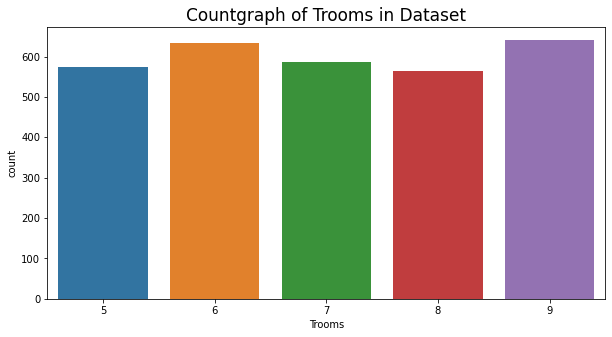

In [11]:
plt.figure(figsize=(10,5))
plt.title("Countgraph of Trooms in Dataset",fontsize=17)
sns.countplot(hdf["Trooms"]);

###### Here we can see that majority of the houses have 9 Trooms in the dataset

### Analysis of Nbedrooms

In [12]:
cat_info("Nbedrooms")

Unique values in Nbedrooms are: [5 4 7 8 6 3 2]
Mode of Nbedrooms is 4
Number of missing values in Nbedrooms is 0


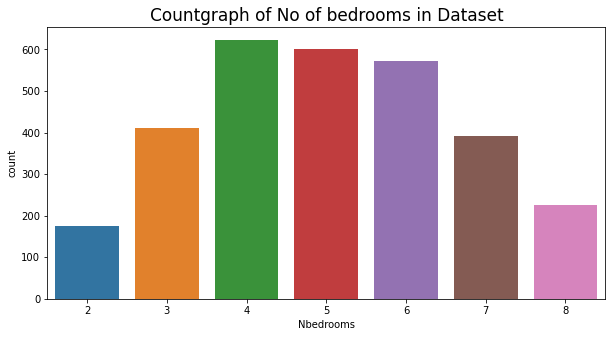

In [13]:
plt.figure(figsize=(10,5))
plt.title("Countgraph of No of bedrooms in Dataset",fontsize=17)
sns.countplot(hdf["Nbedrooms"]);

###### Here we can see that majority of the houses have 4 number of bedrooms in the dataset

### Analysis of Nbwashrooms

In [14]:
cat_info("Nbwashrooms")

Unique values in Nbwashrooms are: [4 3 6 7 5 2 8 1]
Mode of Nbwashrooms is 4
Number of missing values in Nbwashrooms is 0


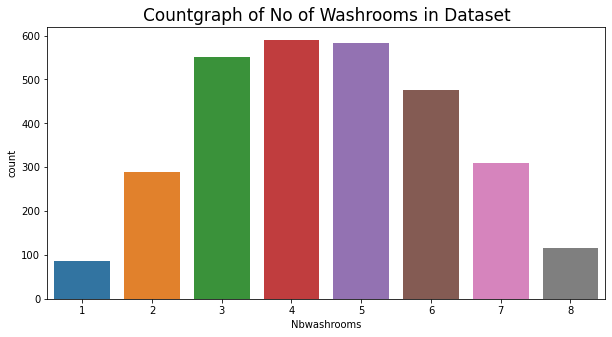

In [15]:
plt.figure(figsize=(10,5))
plt.title("Countgraph of No of Washrooms in Dataset",fontsize=17)
sns.countplot(hdf["Nbwashrooms"]);

###### Observation:Here we can see that majority of the houses have 4 number of washrooms in the dataset

### Analysis of Twashrooms

In [16]:
cat_info("Twashrooms")

Unique values in Twashrooms are: [ 6  4  5  7  9  8  3  2 10]
Mode of Twashrooms is 5
Number of missing values in Twashrooms is 0


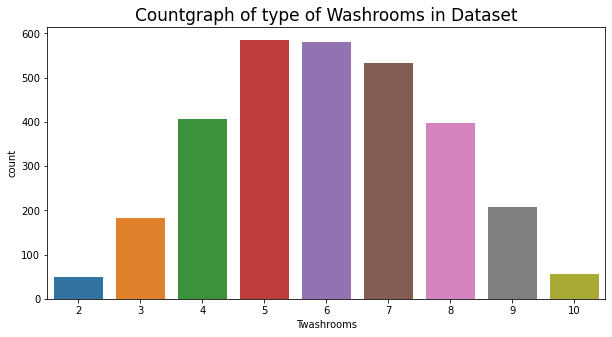

In [17]:
plt.figure(figsize=(10,5))
plt.title("Countgraph of type of Washrooms in Dataset",fontsize=17)
sns.countplot(hdf["Twashrooms"]);

###### Here we can see that majority of the houses have 5 Twashrooms in the dataset

### Analysis of Roof

In [18]:
cat_info("roof")

Unique values in roof are: ['NO' 'YES']
Mode of roof is YES
Number of missing values in roof is 0


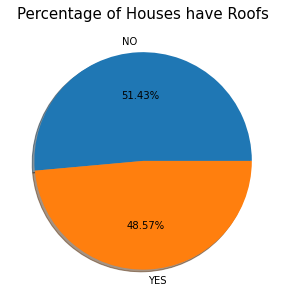

In [19]:
plt.figure(figsize=(14,5))
plt.title('Percentage of Houses have Roofs',fontsize=15)
plt.pie(hdf['roof'].value_counts(),labels=hdf['roof'].unique(),autopct='%0.2f%%',shadow=True);

###### Here we can see that around 51% of the houses don't have roofs in the dataset

### Analysis of Number of Floors

In [20]:
cat_info("Nfloors")

Unique values in Nfloors are: [2 3 5 6 1 4 7]
Mode of Nfloors is 3
Number of missing values in Nfloors is 0


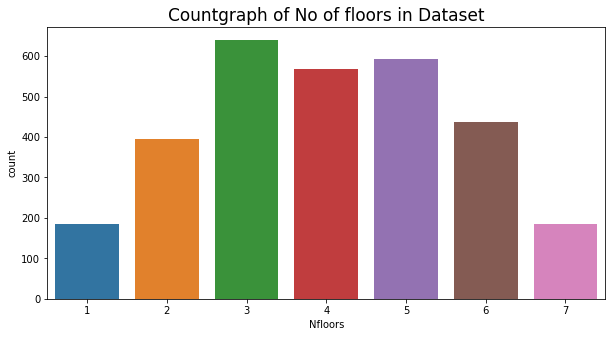

In [21]:
plt.figure(figsize=(10,5))
plt.title("Countgraph of No of floors in Dataset",fontsize=17)
sns.countplot(hdf["Nfloors"]);

###### Here we can see that majority of the houses have 3 floors in the dataset

### Analysis of ANB

In [22]:
cat_info("ANB")

Unique values in ANB are: [6 4 3 2 1 5]
Mode of ANB is 5
Number of missing values in ANB is 0


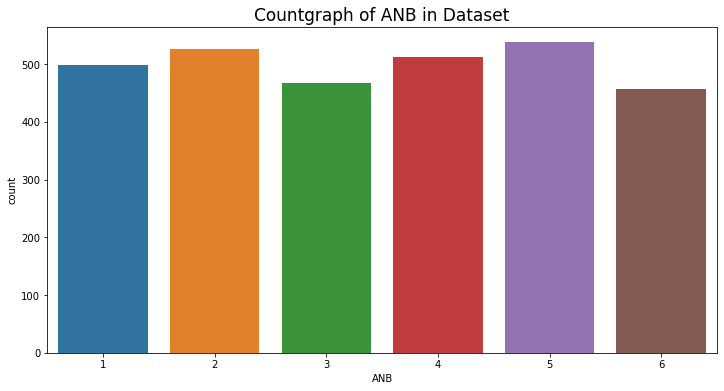

In [23]:
plt.figure(figsize=(12,6))
plt.title("Countgraph of ANB in Dataset",fontsize=17)
sns.countplot(hdf["ANB"]);

###### Here we can see that  majority of the houses have 5 ANB in the dataset

### Analysis of Grade of the houses

In [24]:
cat_info("Grade")

Unique values in Grade are: ['D' 'C' 'B' 'A' 'E']
Mode of Grade is D
Number of missing values in Grade is 0


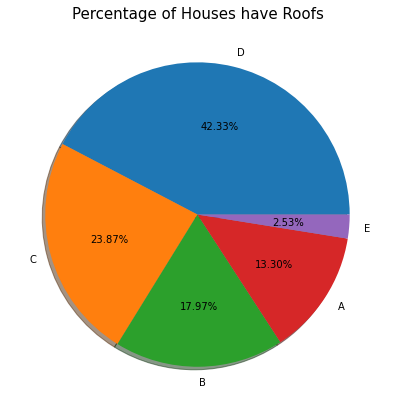

In [25]:
plt.figure(figsize=(20,7))
plt.title('Percentage of Houses have Roofs',fontsize=15)
plt.pie(hdf['Grade'].value_counts(),labels=hdf['Grade'].unique(),autopct='%0.2f%%',shadow=True);

###### Here we can see that around 42% of the houses are of D-Grade in the dataset

### Univariate Analysis of Numerical(Continuous) Variables

In [26]:
def num_info(col):
    print(f"The mean of the {col} is {hdf[col].mean()}")
    print(f"The median of the {col} is {hdf[col].median()}")
    print(f"The mode of the {col} is {hdf[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {hdf[col].std()}")
    print(f"Number of missing values in the {col} is {hdf[col].isnull().sum()}")

### Analysis of Area(total)

In [27]:
num_info('Area(total)')

The mean of the Area(total) is 325.117
The median of the Area(total) is 325.0
The mode of the Area(total) is 344
The standard deviation of the Area(total) is 20.50774244442138
Number of missing values in the Area(total) is 0


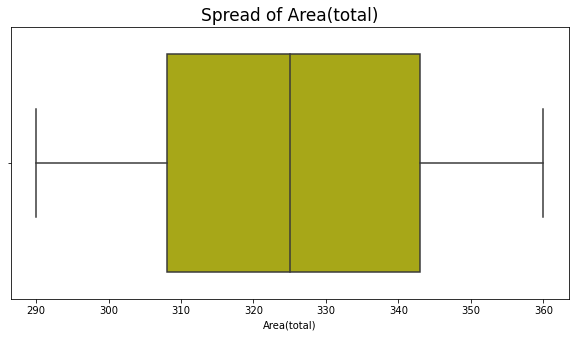

In [28]:
plt.figure(figsize= (10,5))     
plt.title('Spread of Area(total)',fontsize=17)
sns.boxplot(hdf["Area(total)"],color = "y");

###### Here we can see that 50% of our data's  of the area(total) of the houses in our data lies in range of 308 to 344 and normaly distributed

### Analysis of Roof(Area)

In [29]:
num_info('Roof(Area)')

The mean of the Roof(Area) is 48.980666666666664
The median of the Roof(Area) is 71.0
The mode of the Roof(Area) is 0
The standard deviation of the Roof(Area) is 48.74664129867301
Number of missing values in the Roof(Area) is 0


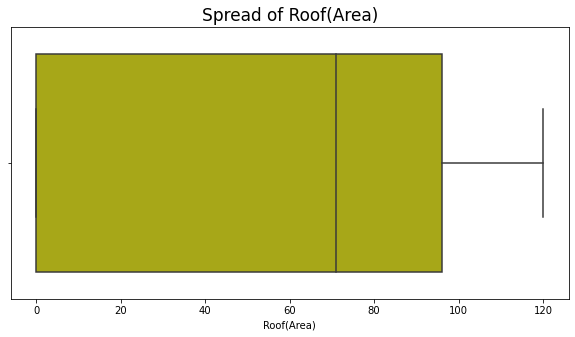

In [30]:
plt.figure(figsize= (10,5))     
plt.title('Spread of Roof(Area)',fontsize=17)
sns.boxplot(hdf["Roof(Area)"],color = "y");

###### Here we can see that 50% of our data's of Roof(Area) lies in the range between 0 to 95 in our dataset and left skewed

### Analysis of Lawn(Area)

In [31]:
num_info('Lawn(Area)')

The mean of the Lawn(Area) is 95.60933333333334
The median of the Lawn(Area) is 96.0
The mode of the Lawn(Area) is 101
The standard deviation of the Lawn(Area) is 14.83738843555081
Number of missing values in the Lawn(Area) is 0


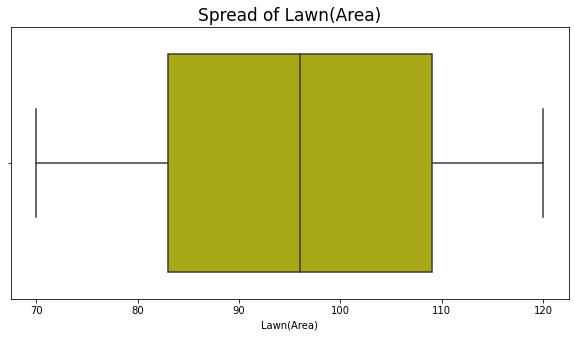

In [32]:
plt.figure(figsize= (10,5))     
plt.title('Spread of Lawn(Area)',fontsize=17)
sns.boxplot(hdf["Lawn(Area)"],color = "y");

###### Here we can see that 50% of our data's  of the Lawn(Area) of the houses lies in range of 84 to 109 in our dataset and normally distributed

### Analysis of API

In [33]:
num_info('API')

The mean of the API is 70.19066666666667
The median of the API is 70.0
The mode of the API is 77
The standard deviation of the API is 17.563460306410814
Number of missing values in the API is 0


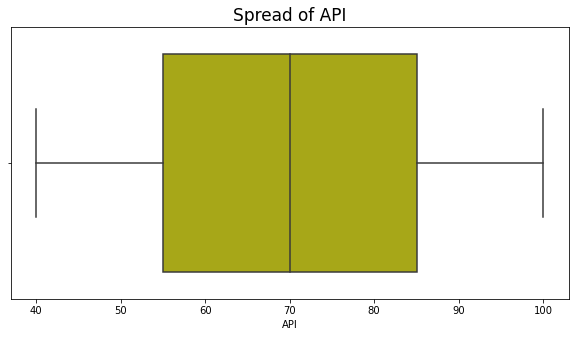

In [34]:
plt.figure(figsize= (10,5))     
plt.title('Spread of API',fontsize=17)
sns.boxplot(hdf["API"],color = "y");

###### Here we can see that 50% of our data's of  the house's API lies in range of 55 to 85 in our dataset and normally distrinuted

### Analysis of Expected Price

In [35]:
num_info("Expected price")

The mean of the Expected price is 3782.9383333333335
The median of the Expected price is 3771.0
The mode of the Expected price is 3335
The standard deviation of the Expected price is 567.1899952345067
Number of missing values in the Expected price is 0


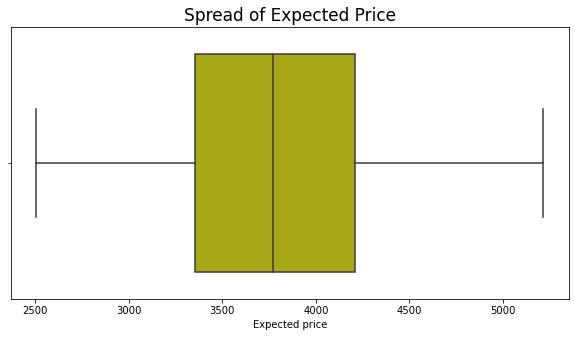

In [36]:
plt.figure(figsize= (10,5))     
plt.title('Spread of Expected Price',fontsize=17)
sns.boxplot(hdf["Expected price"],color = "y");

###### Here we can see that the 50% of our data's expected price of the houses lies in range of 3300 to 4300 in our dataset and normally distributed

## Bivariate Analysis

### Categorical to Categorical

### Analysis of Trooms with Grade

In [37]:
hdf["Grade"].groupby(hdf["Trooms"]).value_counts() 

Trooms  Grade
5       D        501
        E         68
        C          5
6       D        537
        C         89
        E          8
7       C        352
        D        217
        B         17
8       B        269
        C        262
        A         19
        D         15
9       A        380
        B        253
        C          8
Name: Grade, dtype: int64

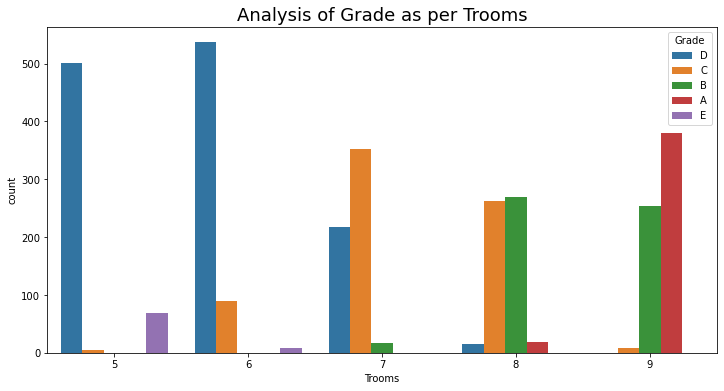

In [38]:
plt.figure(figsize = (12, 6))
plt.title('Analysis of Grade as per Trooms',fontsize=18)
sns.countplot(x = "Trooms", hue = "Grade", data = hdf)
plt.show()

###### Here we can see that majority of the A grade,B grade,C grade,D grade,E grade houses have 9 Trooms,8 Trooms,7 Trooms,6 Trooms and 5 Trooms respectively

### Analysis of Grade with Nbedrooms

In [39]:
hdf["Grade"].groupby(hdf["Nbedrooms"]).value_counts() 

Nbedrooms  Grade
2          D        140
           E         35
3          D        367
           E         34
           C          9
4          D        505
           C        111
           E          7
5          C        318
           D        246
           B         36
6          B        273
           C        255
           A         33
           D         12
7          B        223
           A        147
           C         23
8          A        219
           B          7
Name: Grade, dtype: int64

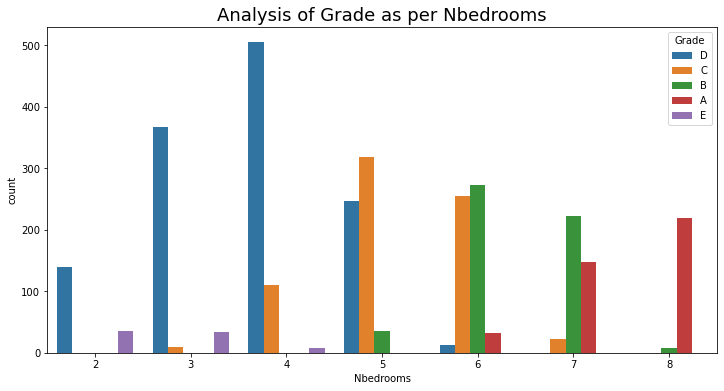

In [40]:
plt.figure(figsize = (12, 6))
plt.title('Analysis of Grade as per Nbedrooms',fontsize=18)
sns.countplot(x = "Nbedrooms", hue = "Grade", data = hdf)
plt.show()

###### Here we can see that majority of the A grade,B grade,C grade,D grade,E grade houses have 8 Nbedrooms,6 Nbedrooms,5 Nbedrooms,4 Nbedrooms and 1 N bedrooms respectively

### Analysis of Grade with Nwashrooms

In [41]:
hdf["Grade"].groupby(hdf["Nbwashrooms"]).value_counts() 

Nbwashrooms  Grade
1            D         67
             E         20
2            D        243
             E         39
             C          6
3            D        486
             C         48
             E         16
4            D        355
             C        223
             B         11
             E          1
5            C        297
             B        160
             D        115
             A         12
6            B        260
             C        142
             A         69
             D          4
7            A        202
             B        108
8            A        116
Name: Grade, dtype: int64

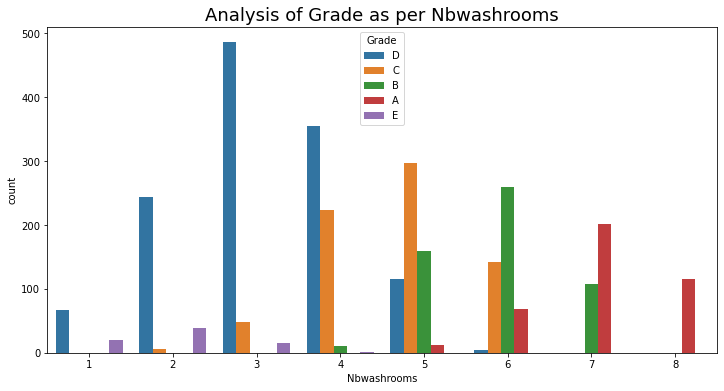

In [42]:
plt.figure(figsize = (12, 6))
plt.title('Analysis of Grade as per Nbwashrooms',fontsize=18)
sns.countplot(x = "Nbwashrooms", hue = "Grade", data = hdf)
plt.show()

###### Here we can see that majority of the A grade,B grade,C grade,D grade,E grade houses have 7 Nbwashrooms,6 Nbwashrooms,5 Nbwashrooms,3 Nbwashrooms and 2 Nbwashrooms respectively

### Analysis of Grade with Twashrooms

In [43]:
hdf["Grade"].groupby(hdf["Twashrooms"]).value_counts() 

Twashrooms  Grade
2           D         39
            E         11
3           D        148
            E         31
            C          4
4           D        353
            C         28
            E         26
5           D        448
            C        123
            E          8
            B          6
6           C        276
            D        223
            B         75
            A          6
7           C        220
            B        219
            D         59
            A         34
8           B        189
            A        144
            C         65
9           A        158
            B         50
10          A         57
Name: Grade, dtype: int64

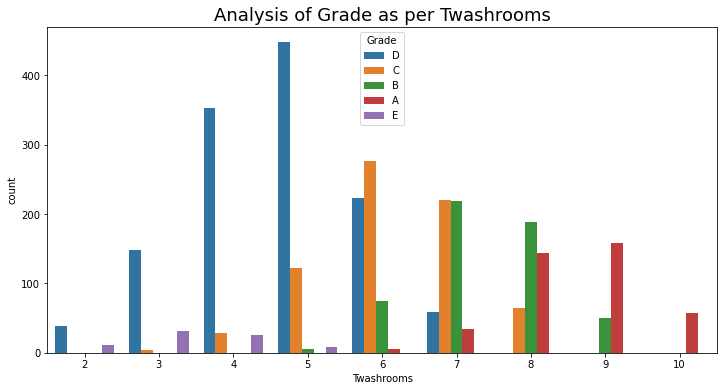

In [44]:
plt.figure(figsize = (12, 6))
plt.title('Analysis of Grade as per Twashrooms',fontsize=18)
sns.countplot(x = "Twashrooms", hue = "Grade", data = hdf)
plt.show()

###### Here we can see that majority of the A grade,B grade,C grade,D grade,E grade houses have 9 Twashrooms,7 Twashrooms,6 Twashrooms,5 Twashrooms,3 Twashrooms respectively

### Analysis of Grade with Nfloors

In [45]:
hdf["Grade"].groupby(hdf["Nfloors"]).value_counts() 

Nfloors  Grade
1        D        161
         E         23
2        D        347
         C         27
         E         21
3        D        461
         C        142
         E         32
         B          5
4        C        251
         D        236
         B         80
5        C        223
         B        188
         A        116
         D         65
6        B        215
         A        149
         C         72
7        A        134
         B         51
         C          1
Name: Grade, dtype: int64

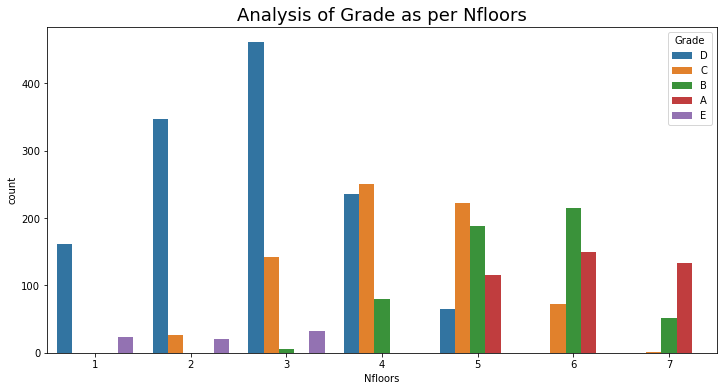

In [46]:
plt.figure(figsize = (12, 6))
plt.title('Analysis of Grade as per Nfloors',fontsize=18)
sns.countplot(x = "Nfloors", hue = "Grade", data = hdf)
plt.show()

###### Here we can see that majority of the A grade,B grade,C grade,D grade,E grade houses have 6 floors,6 floors,4 floors,3 floors, 3floors respectively

### Analysis of Grade with ANB

In [47]:
hdf["Grade"].groupby(hdf["ANB"]).value_counts() 

ANB  Grade
1    D        223
     B         99
     C         98
     A         63
     E         15
2    D        237
     C        122
     B         88
     A         66
     E         14
3    D        189
     C        113
     B         88
     A         68
     E          9
4    D        208
     C        127
     B         88
     A         69
     E         21
5    D        228
     C        139
     B         95
     A         63
     E         13
6    D        185
     C        117
     B         81
     A         70
     E          4
Name: Grade, dtype: int64

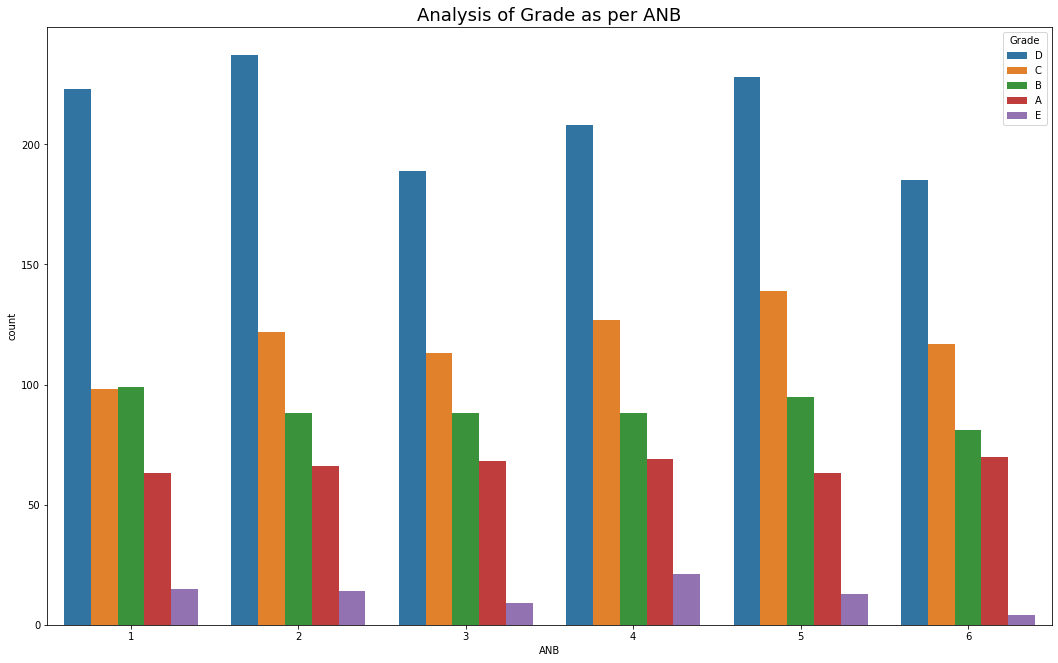

In [48]:
plt.figure(figsize = (18,11))
plt.title('Analysis of Grade as per ANB',fontsize=18)
sns.countplot(x = "ANB", hue = "Grade", data = hdf)
plt.show()

###### Here we can see that majority of the A grade,B grade,C grade,D grade,E grade houses have 6 ANB,1 ANB,5 ANB,2 ANB,4 ANB respectively in the data

### Analysis of  Grade with Roof

In [49]:
hdf["roof"].groupby(hdf["Grade"]).value_counts() 

Grade  roof
A      YES     259
       NO      140
B      YES     303
       NO      236
C      YES     402
       NO      314
D      NO      699
       YES     571
E      NO       68
       YES       8
Name: roof, dtype: int64

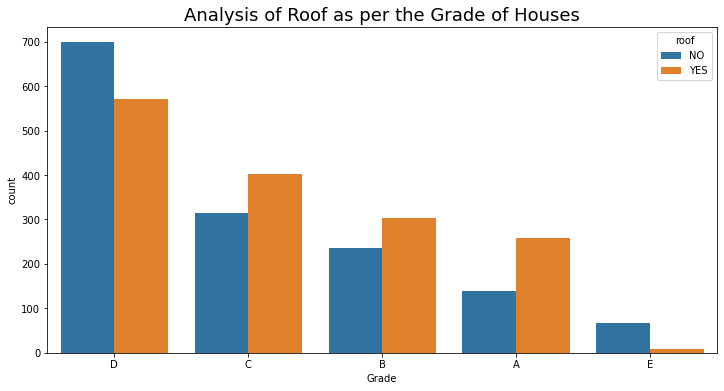

In [50]:
plt.figure(figsize = (12, 6))
plt.title('Analysis of Roof as per the Grade of Houses',fontsize=18)
sns.countplot(x = "Grade", hue = "roof", data = hdf)
plt.show()

###### Here we can see that  D Grade houses are the ones who have the majority of houses with and without roof in the data

### Categorical to Continuous

### Analysis of Grade with Area(total)

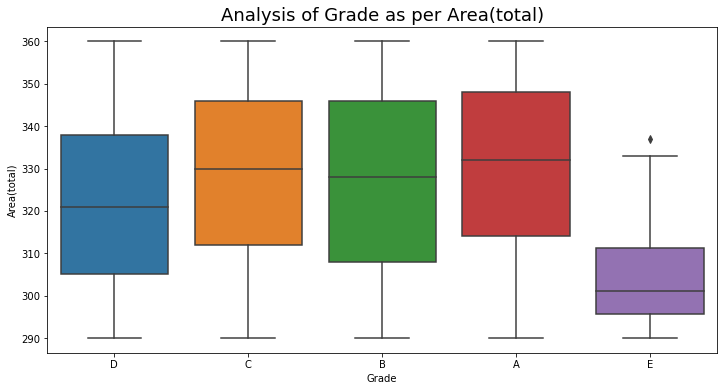

In [51]:
plt.figure(figsize = (12, 6))
plt.title('Analysis of Grade as per Area(total)',fontsize=18)
sns.boxplot(y = "Area(total)", x = "Grade", data = hdf)
plt.show()

###### Here we can see that A Grade houses lies in the highest range of Area(total),while E Grade houses lies in the lowest range of Area(total) in the data

### Analysis of Grade with Roof(Area)

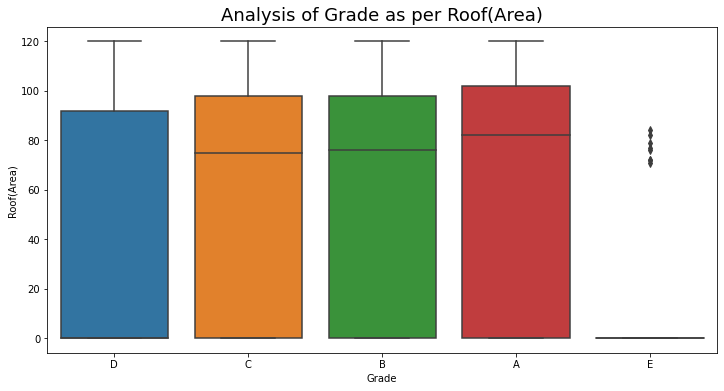

In [52]:
plt.figure(figsize = (12, 6))
plt.title('Analysis of Grade as per Roof(Area)',fontsize=18)
sns.boxplot(y = "Roof(Area)", x = "Grade", data = hdf)
plt.show()

###### Here we can see that A Grade of houses have the highest range of Roof(Area) while E have the lowest range of Roof(Area) in the data

### Analysis of Grade with Lawn(Area)

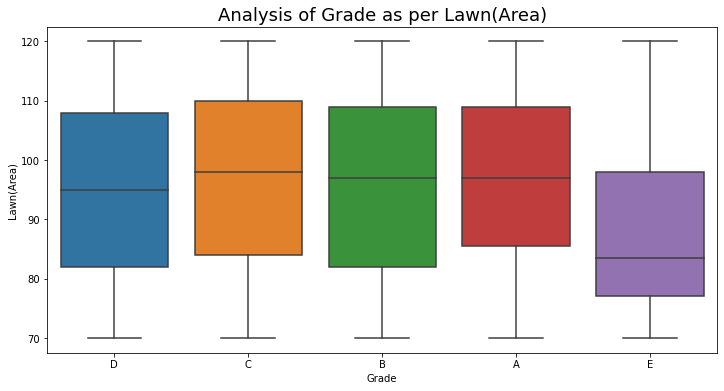

In [53]:
plt.figure(figsize = (12, 6))
plt.title('Analysis of Grade as per Lawn(Area)',fontsize=18)
sns.boxplot(y = "Lawn(Area)", x = "Grade", data = hdf)
plt.show()

###### Here we can see that C Grade houses have the highest range of Lawn(Area) while E Grade houses lies in the lowest range of Lawn(Area)

### Analysis of Grade with API

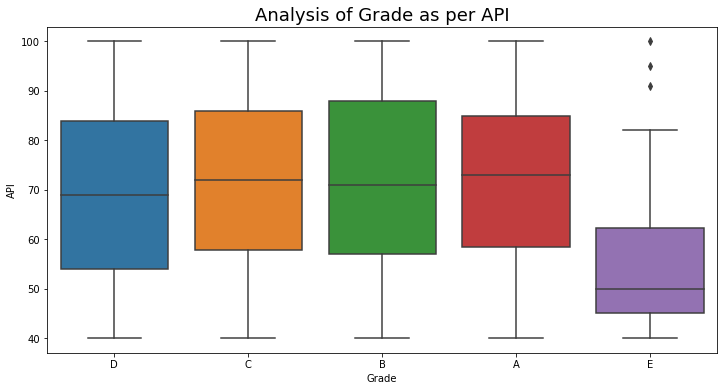

In [54]:
plt.figure(figsize = (12, 6))
plt.title('Analysis of Grade as per API',fontsize=18)
sns.boxplot(y = "API", x = "Grade", data = hdf)
plt.show()

###### Here we can see that B Grade houses is the largest who lies in the spread range of API while E Grade houses lies in the lowest range of API in data

### Analysis of Grade with Expected Price

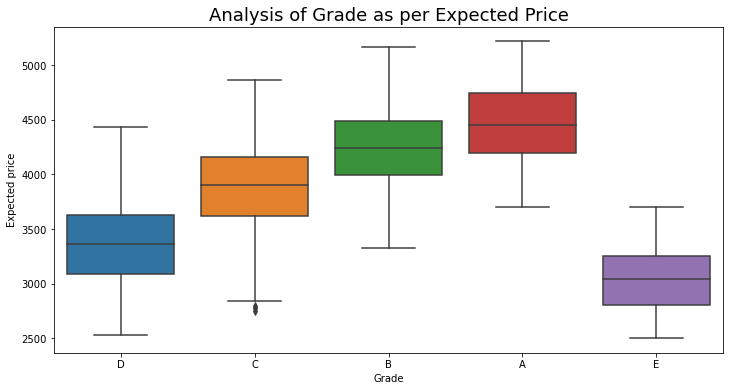

In [55]:
plt.figure(figsize = (12, 6))
plt.title('Analysis of Grade as per Expected Price',fontsize=18)
sns.boxplot(y = "Expected price", x = "Grade", data = hdf)
plt.show()

###### Here we can see that the price range of Grade A is highest in comparison of B,C,D,E while Grade E has the lowest price range of the houses in data

### Numerical(Continuous) To Numerical(Continuous)

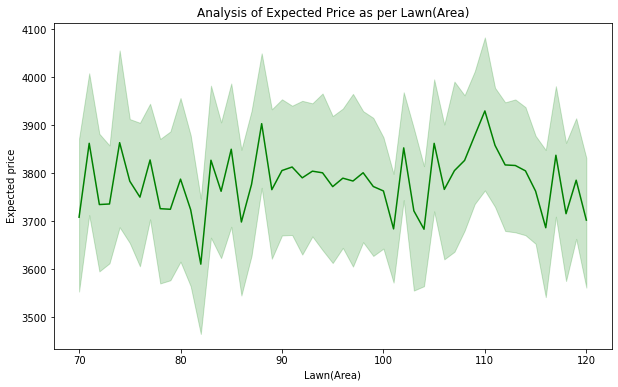

In [56]:
plt.figure(figsize=(10,6))
plt.title('Analysis of Expected Price as per Lawn(Area)',fontsize=12)
sns.lineplot(y = "Expected price", x = "Lawn(Area)", data = hdf,color='g')
plt.show()

###### Here we can see that the Expected Price is fluctuating with respect to Lawn(Area)

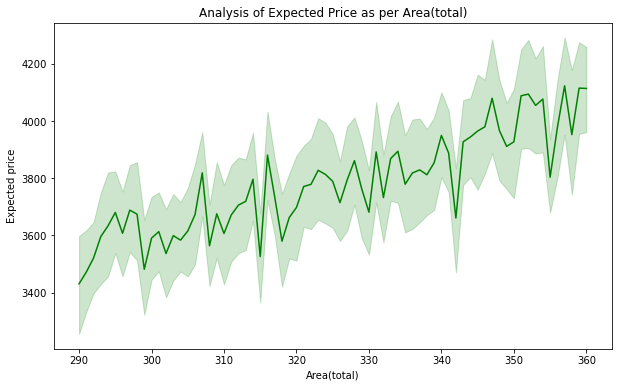

In [57]:
plt.figure(figsize=(10,6))
plt.title('Analysis of Expected Price as per Area(total)',fontsize=12)
sns.lineplot(y = "Expected price", x = "Area(total)", data = hdf,color='g')
plt.show()

###### Here we can see that Expected Price is increasing with the increament of Area(total)

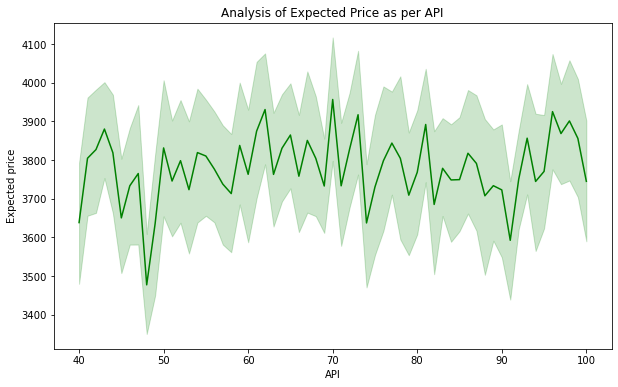

In [58]:
plt.figure(figsize=(10,6))
plt.title('Analysis of Expected Price as per API',fontsize=12)
sns.lineplot(y = "Expected price", x = "API", data = hdf,color='g')
plt.show()

###### Here we can see that Expected Price is fluctuating with respect to API

## Data Preprocessing

In [59]:
hdf.drop('Id',axis=1,inplace=True)

In [60]:
hdf.dtypes

Area(total)        int64
Trooms             int64
Nbedrooms          int64
Nbwashrooms        int64
Twashrooms         int64
roof              object
Roof(Area)         int64
Lawn(Area)         int64
Nfloors            int64
API                int64
ANB                int64
Expected price     int64
Grade             object
dtype: object

### Label Encoding
###### Here we are doing label encoding to convert our object dtypes columns to the numerical ones

In [61]:
label_encoder=preprocessing.LabelEncoder()
hdf['roof']=label_encoder.fit_transform(hdf['roof'])
hdf['Grade']=label_encoder.fit_transform(hdf['Grade'])
hdf.head(4)

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,339,6,5,4,6,0,0,76,2,79,6,3481,3
1,358,5,4,3,4,1,71,96,3,72,4,3510,3
2,324,7,5,4,5,1,101,117,5,64,3,3748,2
3,330,6,4,3,5,1,101,82,2,59,2,3134,3


### Scaling
###### By using StandardScaler we will push the mean to 0 and standard deviation to 1 so that our data should be on same scale so that any larger value of variable will not overshadow the other lower one variable


In [62]:
scale=StandardScaler()
n_df=scale.fit_transform(hdf)
df_scale=pd.DataFrame(n_df,columns=hdf.columns)
df_scale.head(4)

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,0.677077,-0.718985,-0.014071,-0.299518,-0.005973,-1.029090,-1.004968,-1.321837,-1.241831,0.501655,1.488214,-0.532429,0.874159
1,1.603710,-1.422722,-0.625854,-0.882616,-1.125895,0.971733,0.451785,0.026334,-0.625028,0.103034,0.307560,-0.481292,0.874159
2,-0.054476,-0.015248,-0.014071,-0.299518,-0.565934,0.971733,1.067315,1.441914,0.608580,-0.352533,-0.282766,-0.061609,-0.025490
3,0.238145,-0.718985,-0.625854,-0.882616,-0.565934,0.971733,1.067315,-0.917385,-1.241831,-0.637262,-0.873093,-1.144319,0.874159


### Correlation Heatmap

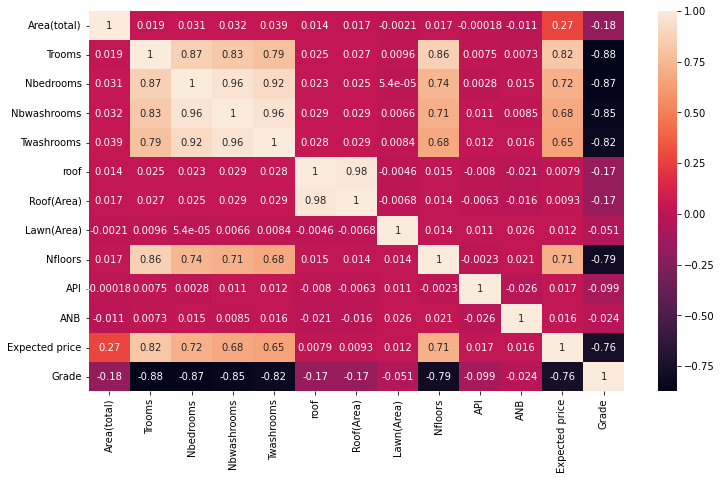

In [63]:
plt.figure(figsize=(12,7))
sns.heatmap(df_scale.corr(),annot=True);

###### By this heatmap we can see that Grade is strongly correlated with Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Nfloors and Expected Price

### Splitting the dataset into training and testing datasets

In [64]:
X=df_scale.drop('Grade',axis=1) #Here we are taking Grade as our target variable
y=hdf['Grade']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=45)

### Models Preparation 

### $$Logisticregression Model$$

In [65]:
LRModel=LogisticRegression()

#### Fitting the Model

In [66]:
LRModel.fit(X_train,y_train)

LogisticRegression()

#### Model Prediction

In [67]:
y_pred=LRModel.predict(X_test)

In [68]:
y_pred_prob=LRModel.predict_proba(X_test)

#### Evaluation of Model

In [69]:
#Calculate Accuracy
v=LRModel.score(X_train,y_train) #Accuracy of your training model
print("Accuracy of LogisticRegression Model on training dataset is",round(v*100),'%')
# Testing Accuracy
k=accuracy_score(y_test,y_pred)
print("Accuracy of the LogisticRegression Model on testing dataset is",round(k*100),'%')
roc_score=roc_auc_score(y_test,y_pred_prob,multi_class='ovr')
print("ROC_AUC Score for LogisticeRegression Model is",round(roc_score*100,4),'%')

Accuracy of LogisticRegression Model on training dataset is 96 %
Accuracy of the LogisticRegression Model on testing dataset is 96 %
ROC_AUC Score for LogisticeRegression Model is 99.8259 %


#### Confusion Matrix

In [70]:
cm=confusion_matrix(y_test,y_pred)
print('\nConfuion Matrix for LogisticRegression Model:')
print(cm)


Confuion Matrix for LogisticRegression Model:
[[115   3   0   0   0]
 [  8 135   6   0   0]
 [  0   2 211   6   0]
 [  0   0   3 384   0]
 [  0   0   0   7  20]]


In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       118
           1       0.96      0.91      0.93       149
           2       0.96      0.96      0.96       219
           3       0.97      0.99      0.98       387
           4       1.00      0.74      0.85        27

    accuracy                           0.96       900
   macro avg       0.97      0.92      0.94       900
weighted avg       0.96      0.96      0.96       900



### $$Naive Bayes Model$$

In [72]:
GModel=GaussianNB()

In [73]:
GModel

GaussianNB()

#### Fitting the Model

In [74]:
GModel.fit(X_train,y_train)

GaussianNB()

#### Prediction of y

In [75]:
y_pred1=GModel.predict(X_test)

In [76]:
y_pred_prob1=GModel.predict_proba(X_test)

#### Evaluation of Model

In [77]:
v1=GModel.score(X_train,y_train)
print('Accuracy of the Gaussian Model on training dataset is',round(v1*100),'%')
k1=metrics.accuracy_score(y_pred1,y_test)
print('Accuracy of the Gausian Model on test data is',round(k1*100),'%')
roc_score1=roc_auc_score(y_test,y_pred_prob1,multi_class='ovr')
print("ROC_AUC Score for NaiveBayes Gaussian Model is",round(roc_score1*100,4),'%')

Accuracy of the Gaussian Model on training dataset is 80 %
Accuracy of the Gausian Model on test data is 80 %
ROC_AUC Score for NaiveBayes Gaussian Model is 96.2877 %


###### Confusion Matrix

In [78]:
cm1=confusion_matrix(y_test,y_pred1)
print('\nConfuion Matrix for NaiveBayes Model:')
cm1


Confuion Matrix for NaiveBayes Model:


array([[102,  16,   0,   0,   0],
       [ 11, 120,  18,   0,   0],
       [  0,  23, 167,  29,   0],
       [  0,   0,  48, 312,  27],
       [  0,   0,   0,   9,  18]], dtype=int64)

In [79]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       118
           1       0.75      0.81      0.78       149
           2       0.72      0.76      0.74       219
           3       0.89      0.81      0.85       387
           4       0.40      0.67      0.50        27

    accuracy                           0.80       900
   macro avg       0.73      0.78      0.75       900
weighted avg       0.81      0.80      0.80       900



### $$DecisionTreeClassifier Model$$

In [80]:
def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')

#### Finding good parameters for our model

In [81]:
from sklearn import tree
kf = KFold(n_splits=8, shuffle=True, random_state=20)
max_depth = [1,2,3,4,5,6,7,8]
max_leaf_nodes=[6,8,10,12,14]
for val in max_depth:
    for j in max_leaf_nodes:
        score = cross_val_score(tree.DecisionTreeClassifier(max_depth= val,max_leaf_nodes=j, random_state= 40), X, y, cv= kf, scoring="neg_mean_squared_error")
        print(f'For max depth: {val},for max leaf node :{j}')
        rmse(score.mean())

For max depth: 1,for max leaf node :6
rmse= 0.66
For max depth: 1,for max leaf node :8
rmse= 0.66
For max depth: 1,for max leaf node :10
rmse= 0.66
For max depth: 1,for max leaf node :12
rmse= 0.66
For max depth: 1,for max leaf node :14
rmse= 0.66
For max depth: 2,for max leaf node :6
rmse= 0.56
For max depth: 2,for max leaf node :8
rmse= 0.56
For max depth: 2,for max leaf node :10
rmse= 0.56
For max depth: 2,for max leaf node :12
rmse= 0.56
For max depth: 2,for max leaf node :14
rmse= 0.56
For max depth: 3,for max leaf node :6
rmse= 0.51
For max depth: 3,for max leaf node :8
rmse= 0.51
For max depth: 3,for max leaf node :10
rmse= 0.51
For max depth: 3,for max leaf node :12
rmse= 0.51
For max depth: 3,for max leaf node :14
rmse= 0.51
For max depth: 4,for max leaf node :6
rmse= 0.51
For max depth: 4,for max leaf node :8
rmse= 0.48
For max depth: 4,for max leaf node :10
rmse= 0.47
For max depth: 4,for max leaf node :12
rmse= 0.48
For max depth: 4,for max leaf node :14
rmse= 0.48
For max 

#### Fitting the model with the tuned hyperparameters

In [82]:
DTModel=DecisionTreeClassifier(max_depth=4,min_samples_split=4,max_leaf_nodes=14)
DTModel.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=14, min_samples_split=4)

#### Prediction of y

In [83]:
y_pred2=DTModel.predict(X_test)

In [84]:
y_pred_prob2=DTModel.predict_proba(X_test)

#### Evaluation of Model

In [85]:
v2=DTModel.score(X_train,y_train)
print('Accuracy of the DecisionTreeClassifier Model on training dataset is',round(v2*100),'%')
k2=metrics.accuracy_score(y_pred2,y_test)
print('Accuracy of the DecisionTreeClassifier Model on test data is',round(k2*100),'%')
roc_score2=roc_auc_score(y_test,y_pred_prob2,multi_class='ovr')
print("ROC_AUC Score for DecisionTreeClassifier Model is",round(roc_score2*100,4),'%')

Accuracy of the DecisionTreeClassifier Model on training dataset is 80 %
Accuracy of the DecisionTreeClassifier Model on test data is 81 %
ROC_AUC Score for DecisionTreeClassifier Model is 93.4495 %


###### Confusion Matrix

In [86]:
cm2=confusion_matrix(y_test,y_pred2)
print('\nConfuion Matrix for DecisionTreeClassifier Model:')
cm2


Confuion Matrix for DecisionTreeClassifier Model:


array([[106,  12,   0,   0,   0],
       [ 24,  81,  44,   0,   0],
       [  0,   3, 180,  36,   0],
       [  0,   0,  29, 358,   0],
       [  0,   0,   0,  27,   0]], dtype=int64)

In [87]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.82      0.90      0.85       118
           1       0.84      0.54      0.66       149
           2       0.71      0.82      0.76       219
           3       0.85      0.93      0.89       387
           4       0.00      0.00      0.00        27

    accuracy                           0.81       900
   macro avg       0.64      0.64      0.63       900
weighted avg       0.79      0.81      0.79       900



## $$RandomForestClassifier Model$$

In [88]:
def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')

#### Finding the good parameters for the model

In [89]:
max_depth = [2,3,4,5,6,7,8]
max_leaf_nodes=[6,8,10,12,14]
for val in max_depth:
    for j in max_leaf_nodes:
        score = cross_val_score(RandomForestClassifier(max_depth= val,max_leaf_nodes=j, random_state= 40), X, y, cv= kf, scoring="neg_mean_squared_error")
        print(f'For max depth: {val},for max leaf node :{j}')
        rmse(score.mean())

For max depth: 2,for max leaf node :6
rmse= 0.47
For max depth: 2,for max leaf node :8
rmse= 0.47
For max depth: 2,for max leaf node :10
rmse= 0.47
For max depth: 2,for max leaf node :12
rmse= 0.47
For max depth: 2,for max leaf node :14
rmse= 0.47
For max depth: 3,for max leaf node :6
rmse= 0.45
For max depth: 3,for max leaf node :8
rmse= 0.44
For max depth: 3,for max leaf node :10
rmse= 0.44
For max depth: 3,for max leaf node :12
rmse= 0.44
For max depth: 3,for max leaf node :14
rmse= 0.44
For max depth: 4,for max leaf node :6
rmse= 0.45
For max depth: 4,for max leaf node :8
rmse= 0.44
For max depth: 4,for max leaf node :10
rmse= 0.43
For max depth: 4,for max leaf node :12
rmse= 0.43
For max depth: 4,for max leaf node :14
rmse= 0.43
For max depth: 5,for max leaf node :6
rmse= 0.45
For max depth: 5,for max leaf node :8
rmse= 0.44
For max depth: 5,for max leaf node :10
rmse= 0.43
For max depth: 5,for max leaf node :12
rmse= 0.42
For max depth: 5,for max leaf node :14
rmse= 0.42
For max 

#### Fitting the model with tuned hyperparameters

In [90]:
RFModel=RandomForestClassifier(max_depth=5,min_samples_split=5,max_leaf_nodes=12)
RFModel.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, max_leaf_nodes=12, min_samples_split=5)

#### Prediction of y

In [91]:
y_pred3=RFModel.predict(X_test)

In [92]:
y_pred_prob3=RFModel.predict_proba(X_test)

#### Evaluation of Model

In [93]:
v3=RFModel.score(X_train,y_train)
print('Accuracy of the RandomForestClassifier Model on training dataset is',round(v3*100),'%')
k3=metrics.accuracy_score(y_pred3,y_test)
print('Accuracy of the RandomForestClassifier Model on test data is',round(k3*100),'%')
roc_score3=roc_auc_score(y_test,y_pred_prob3,multi_class='ovr')
print("ROC_AUC Score for RandomForestClassifier Model is",round(roc_score3*100,4),'%')

Accuracy of the RandomForestClassifier Model on training dataset is 82 %
Accuracy of the RandomForestClassifier Model on test data is 83 %
ROC_AUC Score for RandomForestClassifier Model is 96.9029 %


#### Confusion Matrix

In [94]:
cm3=confusion_matrix(y_test,y_pred3)
print('\nConfuion Matrix for RandomForestClassifier Model:')
cm3


Confuion Matrix for RandomForestClassifier Model:


array([[ 94,  24,   0,   0,   0],
       [  7, 123,  19,   0,   0],
       [  0,   4, 160,  55,   0],
       [  0,   0,  16, 371,   0],
       [  0,   0,   0,  27,   0]], dtype=int64)

In [95]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86       118
           1       0.81      0.83      0.82       149
           2       0.82      0.73      0.77       219
           3       0.82      0.96      0.88       387
           4       0.00      0.00      0.00        27

    accuracy                           0.83       900
   macro avg       0.68      0.66      0.67       900
weighted avg       0.81      0.83      0.82       900



## Comparison of Models(Final Evaluation Of Models)

In [96]:
acs=[96,80,81,83]
rac=[99.8,96.2,93.4,97]
md=['Logistic Regression','Naive Bayes Classifier','DecisionTreeClassifier','RandomForestClassifier']
df=pd.DataFrame({'Model Name':md,'Accuracy Score':acs,'ROC_AUC Score':rac})
df

,Model Name,Accuracy Score,ROC_AUC Score
0,Logistic Regression,96,99.8
1,Naive Bayes Classifier,80,96.2
2,DecisionTreeClassifier,81,93.4
3,RandomForestClassifier,83,97.0


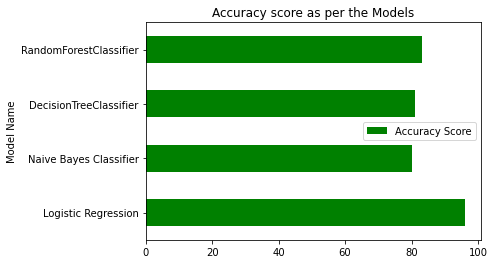

In [97]:
df.plot.barh(x='Model Name',y='Accuracy Score',rot=0,color='g',title="Accuracy score as per the Models");

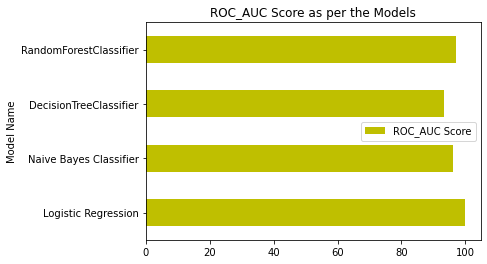

In [98]:
df.plot.barh(x='Model Name',y='ROC_AUC Score',rot=0,color='y',title="ROC_AUC Score as per the Models");

## So from above dataframe and the graphs we can see that Logistic Regression model gives the highest 'Accuracy Score' and 'ROC_AUC Score' on training dataset so we will predict our final value by using this

In [99]:
Final_Prediction_y=LRModel.predict(X_test)
Final_Prediction_y

array([2, 0, 0, 2, 0, 0, 3, 3, 3, 3, 3, 1, 3, 3, 2, 3, 4, 3, 0, 3, 3, 3,
       3, 1, 2, 3, 2, 3, 2, 4, 0, 1, 0, 2, 2, 2, 3, 0, 2, 2, 3, 2, 3, 3,
       3, 2, 2, 3, 1, 2, 0, 3, 3, 1, 2, 3, 3, 2, 2, 3, 1, 0, 1, 1, 3, 3,
       2, 3, 2, 3, 0, 4, 2, 3, 3, 0, 1, 4, 3, 2, 0, 2, 3, 2, 3, 1, 3, 0,
       0, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 0, 2, 2, 3, 2, 0, 3,
       2, 1, 2, 3, 3, 1, 3, 3, 2, 1, 3, 3, 3, 2, 3, 3, 1, 3, 2, 2, 3, 2,
       3, 3, 2, 3, 2, 2, 0, 0, 2, 1, 3, 2, 3, 3, 0, 3, 3, 2, 3, 3, 3, 2,
       2, 1, 3, 0, 0, 3, 3, 3, 1, 3, 0, 1, 0, 2, 3, 3, 1, 3, 1, 2, 0, 3,
       0, 3, 3, 2, 1, 1, 3, 0, 1, 0, 2, 2, 3, 2, 3, 1, 2, 2, 3, 0, 1, 1,
       3, 3, 2, 3, 2, 1, 3, 0, 3, 1, 1, 4, 3, 2, 3, 1, 3, 3, 2, 3, 3, 2,
       1, 3, 2, 3, 2, 3, 2, 4, 4, 0, 1, 3, 2, 3, 3, 3, 1, 1, 2, 3, 3, 3,
       2, 2, 4, 1, 0, 3, 0, 0, 3, 3, 0, 3, 2, 1, 2, 3, 3, 3, 3, 0, 3, 3,
       1, 3, 1, 3, 1, 0, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 1, 3, 3, 1, 0, 3,
       3, 0, 2, 3, 1, 2, 0, 2, 0, 3, 1, 3, 1, 3, 2,